In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [11]:
# Load CSV file into a DataFrame
train_path = "../data/train_normalize.csv"
train_df = pd.read_csv(train_path)

# Ensure all columns are displayed
pd.set_option("display.max_columns", None)

# Display first few rows
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,60,65.0,8450,1,0,100,100,100,60,100,6,60,60,100,90,7,5,2003,2003,80,60,70,70,85,196.0,80,65,100,80,65,20,100,706,10,0,150,856,100,100,1,100,856,854,0,1710,1,0,2,1,3,1,80,8,100,0,0,80,2003.0,66,2,548,65,65,100,0,61,0,0,0,0,0,0,0,0,2,2008,80,100,208500
1,2,20,60,80.0,9600,1,0,100,100,100,40,100,25,50,60,100,70,6,8,1976,1976,80,60,40,40,0,0.0,65,65,70,80,65,100,80,978,10,0,284,1262,100,100,1,100,1262,0,0,1262,0,1,2,0,3,1,50,6,100,1,65,80,1976.0,66,2,460,65,65,100,298,0,0,0,0,0,0,0,0,0,5,2007,80,100,181500
2,3,60,60,68.0,11250,1,0,75,100,100,60,100,6,60,60,100,90,7,5,2001,2002,80,60,70,70,85,162.0,80,65,100,80,65,40,100,486,10,0,434,920,100,100,1,100,920,866,0,1786,1,0,2,1,3,1,80,6,100,1,65,80,2001.0,66,2,608,65,65,100,0,42,0,0,0,0,0,0,0,0,9,2008,80,100,223500
3,4,70,60,60.0,9550,1,0,75,100,100,80,100,7,60,60,100,90,7,5,1915,1970,80,60,60,65,0,0.0,65,65,80,65,80,20,80,216,10,0,540,756,100,80,1,100,961,756,0,1717,1,0,1,0,3,1,80,7,100,1,80,60,1998.0,33,3,642,65,65,100,0,35,272,0,0,0,0,0,0,0,2,2006,80,20,140000
4,5,60,60,84.0,14260,1,0,75,100,100,40,100,16,60,60,100,90,8,5,2000,2000,80,60,70,70,85,350.0,80,65,100,80,65,70,100,655,10,0,490,1145,100,100,1,100,1145,1053,0,2198,1,0,2,1,4,1,80,9,100,1,65,80,2000.0,66,3,836,65,65,100,192,84,0,0,0,0,0,0,0,0,12,2008,80,100,250000


In [12]:
# Define X (features) and y (target)
X = train_df.drop(columns=["SalePrice"])
y = train_df["SalePrice"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# from hyperopt import fmin, tpe, hp, Trials
# from sklearn.impute import SimpleImputer

# # Define objective function for hyperparameter tuning
# def objective_gb(params, X_train_augmented, y_train_augmented):
#     gb = GradientBoostingRegressor(
#         n_estimators=int(params['n_estimators']),
#         max_depth=int(params['max_depth']),
#         learning_rate=params['learning_rate'],
#         subsample=params['subsample'],
#         random_state=42
#     )

#     # Handle missing values
#     imputer = SimpleImputer(strategy='mean')
#     X_train_imputed = imputer.fit_transform(X_train_augmented)

#     # Use cross-validation to evaluate the model
#     score = cross_val_score(gb, X_train_imputed, y_train_augmented, cv=3, scoring='neg_mean_squared_error').mean()
#     return -score  # Hyperopt minimizes the objective function, so return negative MSE

# # Define the hyperparameter search space
# space_gb = {
#     'n_estimators': hp.randint('n_estimators', 100, 501),  # Number of trees
#     'max_depth': hp.randint('max_depth', 1, 21),          # Tree depth
#     'learning_rate': hp.uniform('learning_rate', 0.01, 0.3), # Learning rate
#     'subsample': hp.uniform('subsample', 0.5, 1.0)        # Subsampling fraction
# }

# # Set up trials for tracking
# trials_gb = Trials()

# # Run Hyperopt optimization
# best_gb = fmin(
#     fn=lambda params: objective_gb(params, X_train, y_train),  # Use real train data
#     space=space_gb,
#     algo=tpe.suggest,
#     max_evals=100,  # Number of evaluations
#     trials=trials_gb
# )

# print("\nBest Parameters for Gradient Boosting:", best_gb)

# # Convert best params to correct types
# best_n_estimators = int(best_gb['n_estimators'])
# best_max_depth = int(best_gb['max_depth'])
# best_learning_rate = best_gb['learning_rate']
# best_subsample = best_gb['subsample']


### Gradient Boosting Hyperparameter Tuning Summary

#### **Hyperopt Optimization Results**
- **Total Evaluations:** 100  
- **Best Found Loss (MSE):** **604,808,016.23**  
- **Optimization Time:** **12 minutes 20 seconds**  
- **Average Time per Trial:** **7.41 seconds**  

#### **Best Hyperparameters Found:**
| Hyperparameter    | Best Value |
|------------------|------------|
| **Learning Rate** | 0.0865 |
| **Max Depth**     | 3 |
| **Number of Estimators** | 228 |
| **Subsample Fraction**  | 0.8807 |

#### **Observations:**
- The optimal **learning rate (0.0865)** is relatively small, preventing overfitting while still learning effectively.
- **Max depth of 3** suggests that simpler trees provide better generalization.
- The best **number of estimators (228)** balances performance and overfitting.
- **Subsampling (0.88)** introduces randomness, improving robustness.

The model will now be trained using these optimized hyperparameters for final evaluation.


In [14]:
# Initialize and train Gradient Boosting model with best params
best_model = GradientBoostingRegressor(
    n_estimators=160,
    max_depth=3,
    learning_rate=0.0865,
    subsample=0.087,
    random_state=42,
)
best_model.fit(X_train, y_train)

# Predict on test data
y_pred = best_model.predict(X_test)

# Predict on training data
y_train_pred = best_model.predict(X_train)

# Compute RMSE for training and testing sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)


In [15]:
# Display evaluation results including both train and test RMSE
evaluation_results = pd.DataFrame({
    "Metric": ["Train RMSE", "Test RMSE", "Mean Absolute Error (MAE)", "R² Score"],
    "Value": [train_rmse, test_rmse, mae, r2]
})

print(evaluation_results)

                      Metric         Value
0                 Train RMSE  18355.137112
1                  Test RMSE  25046.181682
2  Mean Absolute Error (MAE)  17047.832444
3                   R² Score      0.870796


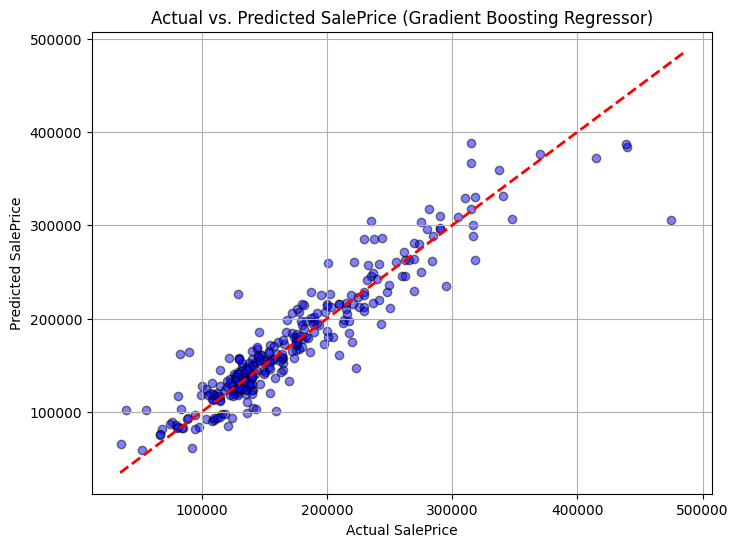

In [16]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", edgecolors="black")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--", color="red", linewidth=2)  # Ideal fit line
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs. Predicted SalePrice (Gradient Boosting Regressor)")
plt.grid(True)
plt.show()

In [17]:
# Get feature importances
feature_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": best_model.feature_importances_
})

# Sort by importance (ascending order)
feature_importance = feature_importance.sort_values(by="Importance", ascending=True)

# Print max and min importance correctly
print(f"Max importance: {feature_importance['Importance'].max()}")
print(f"Min importance: {feature_importance['Importance'].min()}")

feature_importance.head(81)

Max importance: 0.17594986863718137
Min importance: 0.0


,Feature,Importance
69,3SsnPorch,0.000000
15,BldgType,0.000000
74,MiscFeature,0.000000
42,Electrical,0.000000
9,Utilities,0.000000
...,...,...
38,TotalBsmtSF,0.049142
4,LotArea,0.061273
43,1stFlrSF,0.097558
46,GrLivArea,0.117867


In [18]:
# Load the test dataset into a DataFrame
test_path = "../data/test_normalize.csv"
test_df = pd.read_csv(test_path)

# Predict SalePrice using the trained model
predict = best_model.predict(test_df)

# Create a DataFrame to store results with Id and Predicted SalePrice
results_df = test_df[["Id"]].copy()
results_df["PredictedPrice"] = predict  

# Save the results to DataFrame as a CSV file
results_df.to_csv("../results/gradient_boosting.csv", index=False)

print("CSV file saved successfully at: ../results/gradient_boosting.csv")

CSV file saved successfully at: ../results/gradient_boosting.csv
